<a href="https://colab.research.google.com/github/ravi-3690/ML-WORKSHOP-PROJECTS/blob/main/DeepLearning(classify_digits)(25nov).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Welcome to the python session")

Welcome to the python session


In [ ]:
#import libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
#load and preprocess the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_tarin, x_test = x_train/255.0, x_test/255.0

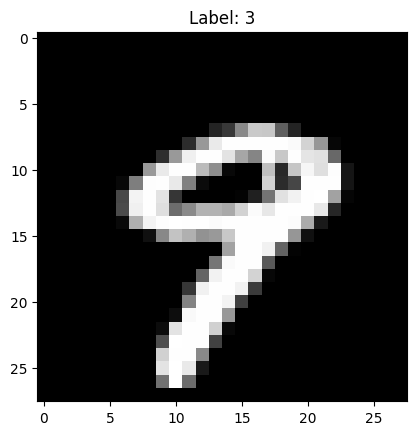

In [ ]:
#visualize a sample

plt.imshow(x_test[9], cmap="gray")
plt.title(f"Label: {y_train[50]}")
plt.show()

In [ ]:
#Build the model
model = Sequential([
    Input(shape=(28,28)),    #Define the input size explicitely
    Flatten(),               #No need to pass input_shape here
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])


In [ ]:
#compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#Train the model
model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7945 - loss: 8.7920 - val_accuracy: 0.8765 - val_loss: 0.5142
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8891 - loss: 0.4609 - val_accuracy: 0.9103 - val_loss: 0.3637
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9160 - loss: 0.3236 - val_accuracy: 0.9231 - val_loss: 0.3223
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9299 - loss: 0.2645 - val_accuracy: 0.9268 - val_loss: 0.2908
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9409 - loss: 0.2372 - val_accuracy: 0.9383 - val_loss: 0.2517


In [ ]:
#Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0944 - loss: 2.2831
Test Accuracy: 9.80%


In [ ]:
#make a prediction
predictions = model.predict(x_test)
print(f"Predicted Label: {predictions[0].argmax()}, True Label: {y_test[0]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted Label: 8, True Label: 7


In [ ]:
model.save("neural.keras")

In [ ]:
from PIL import Image
import numpy as np

#Load the trained model
newmodel = tf.keras.models.load_model('/content/neural.keras')

#Load and preprocess the image
img = Image.open('/content/zero.png')
img = img.convert('L')
img = img.resize((28,28))    #Convert to grayscale
img_array = np.array(img) / 255.0   #Resize  to 28x28 pixels
img_array = img_array.reshape(1, 28, 28, 1)   #Reshape for model input size

In [ ]:
#Make a prediction
predictions = newmodel.predict(img_array)

#Get the predicted label
predicted_label = np.argmax(predictions[0])
print(f"Predicted Label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted Label: 8
